In [1]:
!ls ../../dsc-phase-2-project-v2-3/data

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import MissingIndicator

In [3]:
df = pd.read_csv('../../dsc-phase-2-project-v2-3/data/kc_house_data.csv')

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- waterfront has 2376 nulls
- view has 63 nulls
- yr_renovated has 3,842 nulls

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [8]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
df['yr_renovated'].value_counts().index

Float64Index([   0.0, 2014.0, 2003.0, 2013.0, 2007.0, 2000.0, 2005.0, 1990.0,
              2004.0, 2009.0, 1989.0, 2006.0, 2002.0, 1991.0, 1998.0, 1984.0,
              1999.0, 2008.0, 2010.0, 2001.0, 1983.0, 2015.0, 1985.0, 1986.0,
              1987.0, 1994.0, 1992.0, 1993.0, 1997.0, 1995.0, 1996.0, 1988.0,
              1970.0, 2011.0, 1980.0, 1982.0, 2012.0, 1979.0, 1977.0, 1968.0,
              1975.0, 1964.0, 1969.0, 1963.0, 1973.0, 1981.0, 1965.0, 1978.0,
              1960.0, 1958.0, 1956.0, 1955.0, 1945.0, 1972.0, 1967.0, 1957.0,
              1940.0, 1974.0, 1962.0, 1953.0, 1950.0, 1934.0, 1944.0, 1976.0,
              1948.0, 1946.0, 1959.0, 1971.0, 1951.0, 1954.0],
             dtype='float64')

In [10]:
df.loc[df['yr_renovated'].isna() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,NO,NONE,...,7 Average,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,NO,NONE,...,8 Good,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,NO,NONE,...,7 Average,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,4/16/2015,475000.0,3,2.25,1190,1200,3.0,NO,NONE,...,8 Good,1190,0.0,2008,NaN,98103,47.6542,-122.346,1180,1224
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,NO,AVERAGE,...,10 Very Good,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,NO,NONE,...,8 Good,1480,50.0,2006,NaN,98103,47.6533,-122.346,1530,1282
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,NO,NONE,...,10 Very Good,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125


In [11]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [12]:
df.loc[df['waterfront'].isna() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,...,8 Good,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,...,9 Better,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,...,9 Better,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,...,9 Better,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [14]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [15]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['waterfront'] = df['waterfront'].fillna('NO')
df['view'] = df['view'].fillna('NONE')

In [16]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [17]:
map_cond = {
    "Poor" : -2,
    "Fair" : -1,
    "Average" : 0,
    "Good" : 1,
    "Very Good" : 2   
}

In [18]:
map_grade = {
    "3 Poor" : -4,
    "4 Low" : -3,
    "5 Fair" : -2,
    "6 Low Average" : -1,
    "7 Average" : 0,
    "8 Good" : 1,
    "9 Better" : 2,
    "10 Very Good" : 3,
    "11 Excellent" : 4,
    "12 Luxury" : 5,
    "13 Mansion" : 6
}

In [19]:
map_view = {
    "NONE" : -2,
    "FAIR" : -1,
    "AVERAGE" : 0,
    "GOOD" : 1,
    "EXCELLENT" : 2
}

In [20]:
map_water = {
    "NO" : 0,
    "YES" : 1
}

In [21]:
df["condition"] = df["condition"].map(map_cond)

In [22]:
df["grade"] = df["grade"].map(map_grade)

In [23]:
df["view"] = df["view"].map(map_view)

In [24]:
df["waterfront"] = df["waterfront"].map(map_water)

In [25]:
df = df.loc[df["sqft_basement"] != "?"]

In [26]:
df["sqft_basement"] = df["sqft_basement"].astype(float)

<ipython-input-26-cddedad0429a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sqft_basement"] = df["sqft_basement"].astype(float)


In [27]:

df = df.drop(columns=["date"])

<AxesSubplot:>

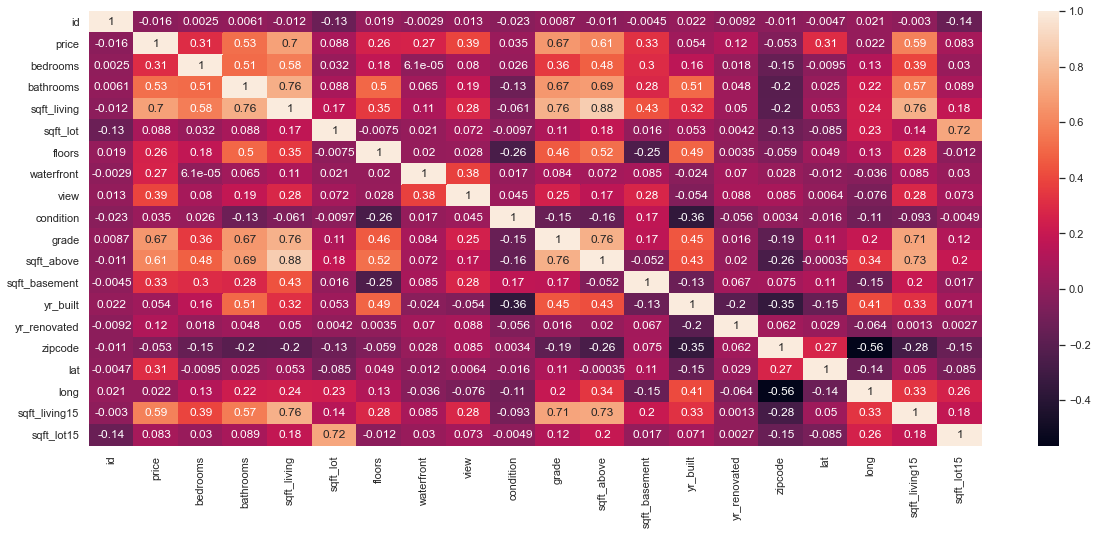

In [28]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(df.corr(), annot=True)

In [29]:
X = df["sqft_living"]
y = df["price"]

sqft_price = sm.OLS(y, sm.add_constant(X)).fit()

In [30]:
simple_model_summary = sqft_price.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:00:44   Log-Likelihood:            -2.9378e+05
No. Observations:               21143   AIC:                         5.876e+05
Df Residuals:                   21141   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.513e+04   4462.443    -10.113      0.000   -5.39e+04   -3.64e+04
sqft_living   281.4327      1.962    143.454      0.000     277.587     285.278
==============================================================================
Omnibus:                    14518.924   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           535834.159
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      27.006   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X1 = df.drop(columns=["price"])
y = df["price"]

all_price = sm.OLS(y, sm.add_constant(X1)).fit()

In [32]:
simple_model_summary = all_price.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2744.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:00:44   Log-Likelihood:            -2.8823e+05
No. Observations:               21143   AIC:                         5.765e+05
Df Residuals:                   21124   BIC:                         5.766e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.085e+06   2.97e+06      2.725      0.006    2.27e+06    1.39e+07
id            -1.189e-06   4.89e-07     -2.433      0.015   -2.15e-06   -2.31e-07
bedrooms      -3.596e+04   1925.274    -18.677      0.000   -3.97e+04   -3.22e+04
bathrooms      4.126e+04   3304.177     12.487      0.000    3.48e+04    4.77e+04
sqft_living     110.5654      2.303     48.009      0.000     106.051     115.079
sqft_lot          0.1091      0.049      2.227      0.026       0.013       0.205
floors         7286.9958   3649.162      1.997      0.046     134.360    1.44e+04
waterfront     6.252e+05   1.84e+04     33.985      0.000    5.89e+05    6.61e+05
view           5.406e+04   2148.920     25.158      0.000    4.99e+04    5.83e+04
condition      2.687e+04   2374.556     11.316      0.000    2.22e+04    3.15e+04
grade          9.676e+04   2185.251     44.277      0.000    9.25e+04    1.01e+05
sqft_above       70.4009      2.279     30.896      0.000      65.935      74.867
sqft_basement    40.1622      2.681     14.982      0.000      34.908      45.416
yr_built      -2642.7964     72.891    -36.257      0.000   -2785.668   -2499.925
yr_renovated     23.5769      4.035      5.842      0.000      15.667      31.487
zipcode        -587.5519     33.382    -17.601      0.000    -652.983    -522.121
lat            5.998e+05   1.09e+04     55.210      0.000    5.79e+05    6.21e+05
long           -2.16e+05   1.33e+04    -16.191      0.000   -2.42e+05    -1.9e+05
sqft_living15    21.9187      3.486      6.288      0.000      15.087      28.751
sqft_lot15       -0.3912      0.075     -5.219      0.000      -0.538      -0.244
==============================================================================
Omnibus:                    17965.188   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1815141.718
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      47.829   Cond. No.                     3.34e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.54e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
X2 = df.drop(columns=["price", "grade", "sqft_above", "sqft_living15", "bathrooms", "sqft_lot15"])
y = df["price"]

all_price_1 = sm.OLS(y, sm.add_constant(X2)).fit()

In [34]:
simple_model_summary = all_price_1.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2969.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:00:44   Log-Likelihood:            -2.8947e+05
No. Observations:               21143   AIC:                         5.790e+05
Df Residuals:                   21128   BIC:                         5.791e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.517e+06   3.09e+06      1.463      0.143   -1.53e+06    1.06e+07
id            -5.332e-07   5.17e-07     -1.032      0.302   -1.55e-06     4.8e-07
bedrooms      -4.321e+04   1985.599    -21.762      0.000   -4.71e+04   -3.93e+04
sqft_living     304.1419      2.610    116.522      0.000     299.026     309.258
sqft_lot         -0.0944      0.038     -2.494      0.013      -0.169      -0.020
floors         3.234e+04   3683.236      8.781      0.000    2.51e+04    3.96e+04
waterfront      5.93e+05   1.95e+04     30.427      0.000    5.55e+05    6.31e+05
view           7.055e+04   2228.945     31.650      0.000    6.62e+04    7.49e+04
condition      3.008e+04   2510.934     11.981      0.000    2.52e+04     3.5e+04
sqft_basement   -63.7141      4.489    -14.193      0.000     -72.513     -54.915
yr_built      -1473.0081     70.506    -20.892      0.000   -1611.206   -1334.810
yr_renovated     35.0240      4.242      8.257      0.000      26.710      43.338
zipcode        -725.8268     35.160    -20.644      0.000    -794.743    -656.911
lat            7.075e+05   1.13e+04     62.629      0.000    6.85e+05     7.3e+05
long           -2.95e+05   1.38e+04    -21.373      0.000   -3.22e+05   -2.68e+05
==============================================================================
Omnibus:                    15110.414   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           855640.334
Skew:                           2.853   Prob(JB):                         0.00
Kurtosis:                      33.638   Cond. No.                     1.14e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X3 = df.drop(columns=["price", "grade", "sqft_above", "sqft_living15", "bathrooms", "sqft_lot15", "id"])
y = df["price"]

all_price_2 = sm.OLS(y, X3).fit()

In [36]:
simple_model_summary = all_price_2.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.360e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:00:44   Log-Likelihood:                     -2.8947e+05
No. Observations:               21143   AIC:                                  5.790e+05
Df Residuals:                   21130   BIC:                                  5.791e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.305e+04   1982.265    -21.718      0.000   -4.69e+04   -3.92e+04
sqft_living     304.7729      2.577    118.245      0.000     299.721     309.825
sqft_lot         -0.0840      0.037     -2.252      0.024      -0.157      -0.011
floors         3.114e+04   3595.483      8.662      0.000    2.41e+04    3.82e+04
waterfront     5.934e+05   1.95e+04     30.445      0.000    5.55e+05    6.32e+05
view            7.02e+04   2219.788     31.626      0.000    6.59e+04    7.46e+04
condition      3.065e+04   2484.508     12.337      0.000    2.58e+04    3.55e+04
sqft_basement   -64.8893      4.421    -14.677      0.000     -73.555     -56.224
yr_built      -1435.3142     65.483    -21.919      0.000   -1563.665   -1306.963
yr_renovated     35.3611      4.236      8.347      0.000      27.057      43.665
zipcode        -683.0354     18.643    -36.637      0.000    -719.578    -646.493
lat            7.073e+05   1.13e+04     62.625      0.000    6.85e+05    7.29e+05
long          -2.971e+05   1.38e+04    -21.603      0.000   -3.24e+05    -2.7e+05
==============================================================================
Omnibus:                    15105.893   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           853107.347
Skew:                           2.853   Prob(JB):                         0.00
Kurtosis:                      33.591   Cond. No.                     1.32e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""